 #                                       SALES ANALYSIS

### Indexing
* 1.Import Libraries
* 2.Read file
* 3.Dataframe Overview
* 4.Product at a glance
* 5.Data cleaning
* 6.Feature Engineering
* 7.Volume, Revenue, Average Deal Size
* 8.Revenue and Growth Over Months
* 9.Revenue by Month and Product
* 10.Regional Sales Mapping
* 11.Most Selling Products
* 12.Sold Together (Most common pair of products sold together)
* 13.High-Volume Sales Days
* 14.High-volume Sales Hours

### 1.Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar
from itertools import combinations
from collections import Counter

### 2.Read sales.csv

In [2]:
df = pd.read_csv('./sales_data/sales.csv')

### 3.Dataframe Overview

In [3]:
#Check the size
print(f"The dataframe consists of {df.shape[0]} rows and {df.shape[1]} colums which are {list(df.columns)}!")

The dataframe consists of 186495 rows and 6 colums which are ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']!


In [4]:
#Check five first rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921.0,USB-C Charging Cable,1.0,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922.0,Macbook Pro Laptop,1.0,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923.0,ThinkPad Laptop,1.0,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924.0,27in FHD Monitor,1.0,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925.0,Bose SoundSport Headphones,1.0,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [5]:
#Check last 5 rows
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186490,236665.0,Wired Headphones,1.0,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
186491,236666.0,20in Monitor,1.0,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
186492,236667.0,AAA Batteries (4-pack),1.0,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
186493,236668.0,Wired Headphones,1.0,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"
186494,236669.0,AAA Batteries (4-pack),1.0,2.99,07/10/19 01:50,"743 9th St, New York City, NY 10001"


In [6]:
#Check the data types
df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### 4.Product at a glance

In [7]:
print(f"Number of unique products:{df['Product'].dropna().nunique()} \n\nProducts:{list(df['Product'].dropna().unique())}")

Number of unique products:19 

Products:['USB-C Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', '27in FHD Monitor', 'Bose SoundSport Headphones', 'Apple Airpods Headphones', 'Lightning Charging Cable', 'Wired Headphones', 'Flatscreen TV', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', '34in Ultrawide Monitor', 'iPhone', 'Google Phone', '27in 4K Gaming Monitor', '20in Monitor', 'LG Dryer', 'Vareebadd Phone', 'LG Washing Machine']


### 5.Data Cleaning

#### Drop nan rows

In [8]:
nan_df = df[df.isnull().any(axis=1)]
nan_df.head()
df.dropna(axis=0,how='all', inplace=True)

#### Amend data types

In [9]:
#Make quantity and price numeric type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

### 6.Feature Engineering
In this section we do some tranformations in the dataset like adding columns with new measurements and values that are going to help us in the future analysis

#### Task1 ---> Create a "Month" column

In [10]:
df['Month'] = df['Order Date'].str[0:2].astype('int64')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921.0,USB-C Charging Cable,1.0,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922.0,Macbook Pro Laptop,1.0,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923.0,ThinkPad Laptop,1.0,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924.0,27in FHD Monitor,1.0,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925.0,Bose SoundSport Headphones,1.0,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


#### Task2 ---> Create a "Revenue" column

In [11]:
df['Revenue'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,209921.0,USB-C Charging Cable,1.0,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922.0,Macbook Pro Laptop,1.0,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923.0,ThinkPad Laptop,1.0,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924.0,27in FHD Monitor,1.0,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925.0,Bose SoundSport Headphones,1.0,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


#### Task3 ---> Create a "City_State" column

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].strip(' ').split(' ')[0]

df['city_state'] = df['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

#### Task4 ---> Create an "Hour" column

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['hour'] = df['Order Date'].dt.hour

#### Task5 ---> Create a "Day" column

In [14]:
df['day'] = df['Order Date'].dt.day_name()

### 7.Volume, Revenue, Average Deal Size

In [15]:
products_sold=df['Quantity Ordered'].sum().astype('int')
revenue=df['Revenue'].sum()
average_deal_size=round(revenue/len(df),2)
print(f"During 2019 we sold {products_sold} products, we had {revenue} million dollars revenue with a {average_deal_size} dollars average deal size")

During 2019 we sold 209079 products, we had 34492035.97 million dollars revenue with a 185.49 dollars average deal size


### 8.Revenue and Growth Over Months

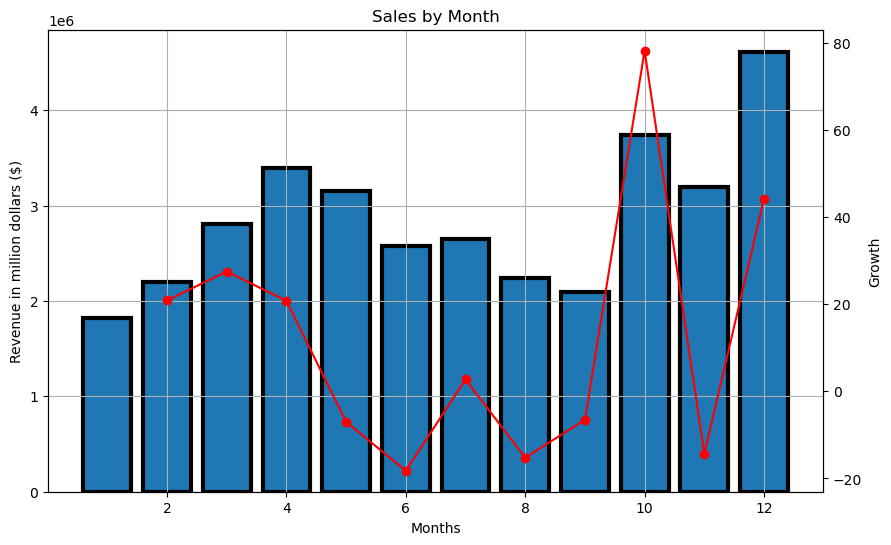

In [16]:
#Group by Month and sum up Revenue for each Month
grouped_sales_by_month = df.groupby('Month')['Revenue'].sum().reset_index(name='Total Revenue')
#Find growth per Month
grouped_sales_by_month['Growth'] = round(grouped_sales_by_month['Total Revenue'].pct_change() * 100,2)

#Now lets create the bar representation
plt.figure(figsize=(10, 6))
plt.bar(grouped_sales_by_month['Month'], grouped_sales_by_month['Total Revenue'], edgecolor='black', linewidth=3)
plt.title('Sales by Month')
plt.xlabel('Months')
plt.ylabel('Revenue in million dollars ($)')

plt.grid()
#In this part we add a secondary axis to depict the growth of sales as percentage
plt.twinx()
plt.plot(grouped_sales_by_month['Month'], grouped_sales_by_month['Growth'], color='red', marker='o')
plt.ylabel('Growth')
plt.show()




### 9.Revenue by Month and Product

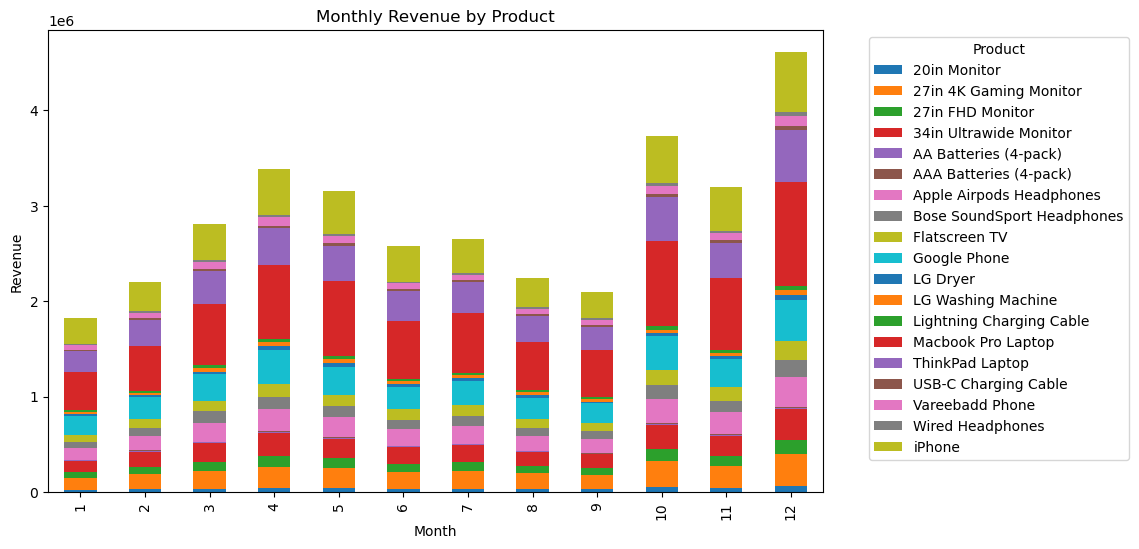

In [17]:
grouped_data = df.groupby(['Month', 'Product'])['Revenue'].sum().unstack()

# Plotting stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Monthly Revenue by Product')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### 10.Regional Sales Mapping

In [18]:
#Group data by city and sum quantity ordered
group_by_city = df.groupby('city_state')['Quantity Ordered'].count().reset_index(name='Volume')

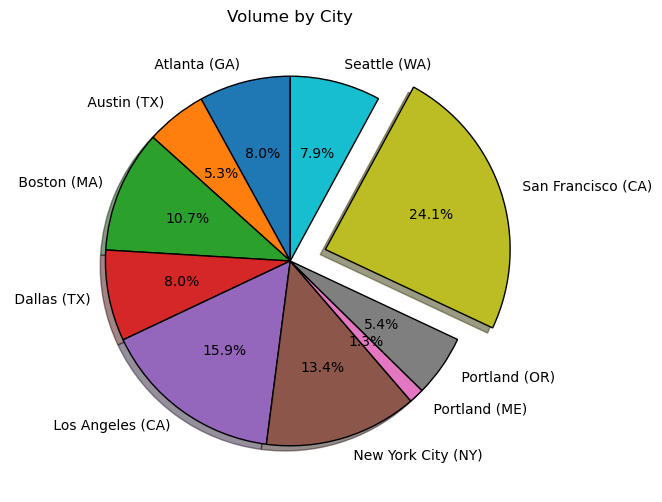

In [19]:
#Plot a pie chart
plt.figure(figsize=(10, 6))
myexplode = [0,0,0,0,0,0,0,0, 0.2, 0]
plt.pie(group_by_city['Volume'], labels=group_by_city['city_state'],wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%', startangle=90, explode=myexplode, shadow=True)
plt.title('Volume by City')
plt.show()

In [20]:
group_by_city_revenue = df.groupby('city_state')['Revenue'].sum().reset_index(name='Revenue')

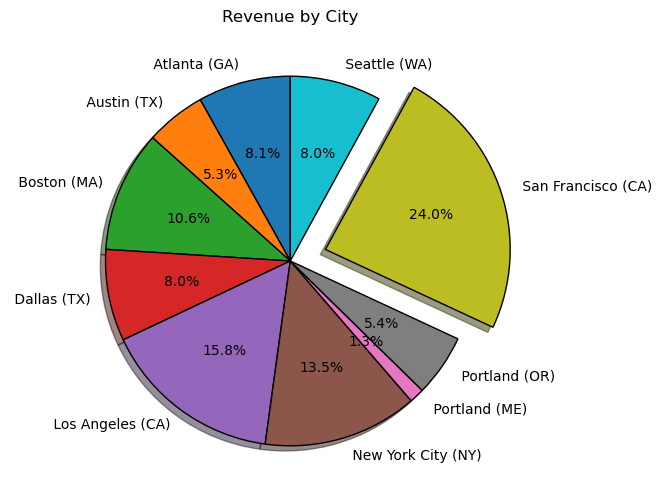

In [21]:
#Plot a pie chart
plt.figure(figsize=(10, 6))
myexplode = [0,0,0,0,0,0,0,0, 0.2, 0]
plt.pie(group_by_city_revenue['Revenue'], labels=group_by_city_revenue['city_state'],wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%', startangle=90, explode=myexplode, shadow=True)
plt.title('Revenue by City')
plt.show()

### 11.Most Selling Products

In [22]:
#Group by products and sum up quantities sold for each product
most_selling_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index(name='Volume').sort_values(by='Volume', ascending=False).head()
most_selling_products

,Product,Volume
5,AAA Batteries (4-pack),31017.0
4,AA Batteries (4-pack),27635.0
15,USB-C Charging Cable,23975.0
12,Lightning Charging Cable,23217.0
17,Wired Headphones,20557.0


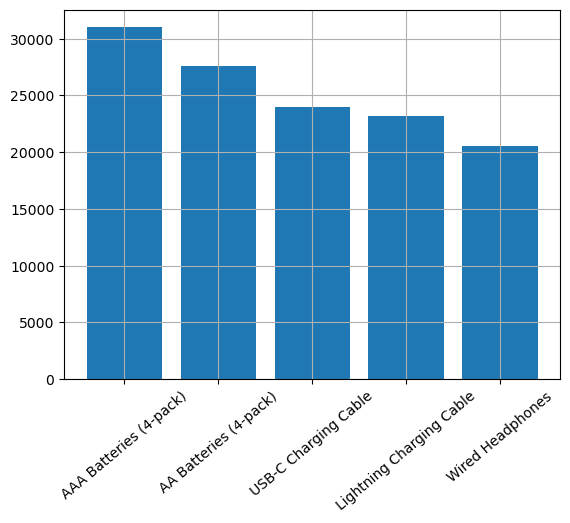

In [23]:
most_selling_products['Volume'] = most_selling_products['Volume'].astype('int') 
plt.bar(most_selling_products['Product'], most_selling_products['Volume'])
plt.xticks(rotation=40)
plt.grid()
plt.show()

### 12.Sold Together

In [24]:
#Put together all the duplicated order ids
duplicate_order_id = df[df['Order ID'].duplicated(keep=False)]

#Combine all the products sold on this id in one cell
duplicate_order_id['grouped'] = duplicate_order_id.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

#Keep only one row per order id, we are interested only for the products which are the same in any common order id
columns_to_check = ['Order ID']
sold_together_df = duplicate_order_id[['Order ID','grouped']].drop_duplicates(subset=columns_to_check)

#The outcome is the total products purchased for each order id if it is more than one
sold_together_df

/tmp/ipykernel_15281/2435836321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_order_id['grouped'] = duplicate_order_id.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,grouped
17,209938.0,"iPhone,Wired Headphones"
29,209949.0,"Google Phone,USB-C Charging Cable"
41,209960.0,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961.0,"iPhone,Lightning Charging Cable"
147,210064.0,"Lightning Charging Cable,27in FHD Monitor"
...,...,...
186395,236576.0,"Google Phone,USB-C Charging Cable"
186422,236602.0,"Lightning Charging Cable,iPhone"
186437,236616.0,"Google Phone,USB-C Charging Cable"
186465,236642.0,"Wired Headphones,Macbook Pro Laptop"


In [25]:
#Create a counter object to keep track of our combinations
count = Counter()

"""Iterate the grouped column and make all the combinations of the items purchased 
together, then add them in the counter object and at last find the most common combinations"""

for row in sold_together_df['grouped']:
    
    row_ls = row.split(',')
    count.update(combinations(row_ls,2))

#Ten most common ordered together    
count.most_common(10) 

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### 13.High-Volume Sales Days

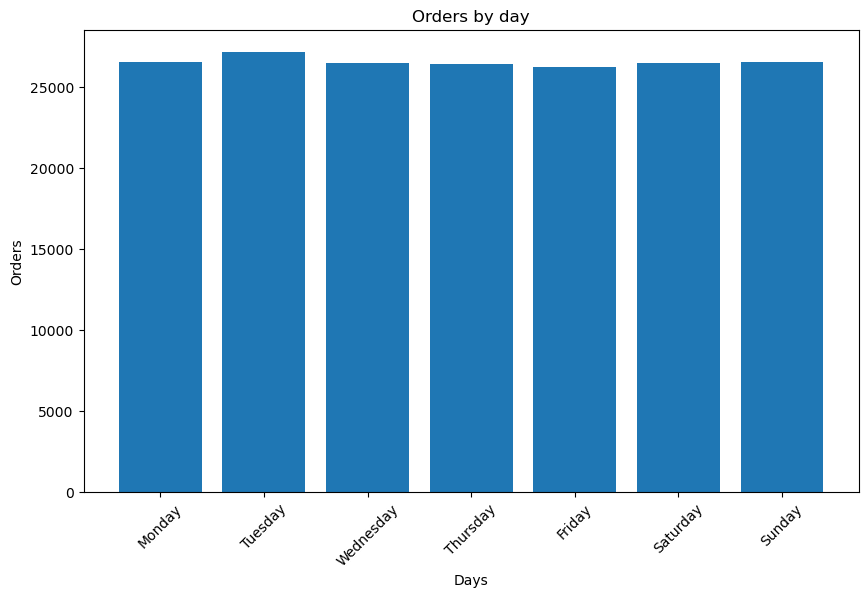

In [26]:
#group by days and count them 
group_by_days = df.groupby('day')['day'].count()

desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the DataFrame based on the desired order
group_by_days = group_by_days.reindex(desired_order)
group_days = group_by_days.reset_index(name='Volume')


#Plot the volume against day
plt.figure(figsize=(10, 6))
plt.bar(group_days['day'], group_days['Volume'])
plt.title('Orders by day')
plt.xlabel('Days')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.show()

### 14.High-volume Sales Hours

In [27]:
#Count the placed orders per hour of the day durimg the year
group_by_hours = df.groupby('hour')['hour'].count().reset_index(name='orders')

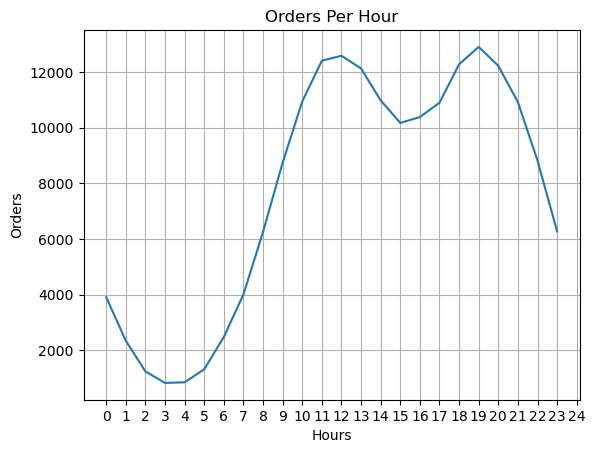

In [28]:
#Plot the sales against hours of the day
hours=[i for i in range(0,25)]
plt.plot(group_by_hours['hour'], group_by_hours['orders'])
plt.xticks(hours)
plt.grid()
plt.title('Orders Per Hour')
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.show()